#  Fashion MNIST Dataset


### Content
The dataset contains 70 000 labeled images of fashion clothing. Each image is 28 pixels in height and width, which in total gives 784 pixels. Every pixel has a value associated with it, indicating its brightness or darkness, with higher number meaning darker. The value is ranged between 0 and 255. Given set was split into training and testing sets, both containing 785 columns (attributes). The first attribute means label class, which is the type of clothing, the rest containing values for specified pixel.

For each record pixels are allocated as 2-D array in 1-D memory, for example, to get and value of pixel in second row and third column we need to resolve this equation x = i*28 + j, where x is the column number from 1 to 784, i is the row number and j is the column number where both this values are integers between 0 and 27.


In this project I will be using the already devided train version, which consist 60 000 record. Comparing to the original 70 000 it is still a really huge data set.

### Data overview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.random_projection import GaussianRandomProjection


In [ ]:
# Importing data
dataset = pd.read_csv('./data/fashion-mnist_train.csv')

dataset.head(8)

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   
5      4       0       0       0       5       4       5       5       3   
6      4       0       0       0       0       0       0       0       0   
7      5       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   
5       5  ...         7         8         7         4         3         7   
6       0  ...        14         0         0         0         0         0   
7       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  
5         5         0         0         0  
6         0         0         0         0  
7         0         0         0         0  

[8 rows x 785 columns]

### Labels

The label column contains values which mean the type of clothing according to table below.

| Label number | Category    |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |


In [ ]:
# Mapping labels to numbers
labels_mapping = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
dataset['label_name'] = dataset['label'].map(labels_mapping)
dataset

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel776  pixel777  pixel778  pixel779  pixel780  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0        30        43         0   
3           0  ...         0         0         0         0         1   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
59995       0  ...         0         0         0         0         0   
59996       0  ...         0         0         0         0         0   
59997       0  ...       162       163       135        94         0   
59998       0  ...         0         0         0         0         0   
59999       0  ...         0         0         0         0         0   

       pixel781  pixel782  pixel783  pixel784   label_name  
0             0         0         0         0     Pullover  
1             0         0         0         0   Ankle boot  
2             0         0         0         0        Shirt  
3             0         0         0         0  T-shirt/top  
4             0         0         0         0        Dress  
...         ...       ...       ...       ...          ...  
59995         0         0         0         0   Ankle boot  
59996         0         0         0         0      Trouser  
59997         0         0         0         0          Bag  
59998         0         0         0         0          Bag  
59999         0         0         0         0      Sneaker  

[60000 rows x 786 columns]

### Data summary

#### Summary information about the training dataset

In [ ]:
# Infromation about data
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 786 entries, label to label_name
dtypes: int64(785), object(1)
memory usage: 359.8+ MB
None


#### Statistical summary of the training dataset

In [ ]:
# Statistical infromation about data
print(dataset.describe())

              label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.198283      5.682000   
std        4.306912      5.836188      8.215169    

#### Number of occurrences of each class in the training dataset

In [ ]:
print(dataset['label'].value_counts())

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64


#### Average image of Fashion MNIST Dataset

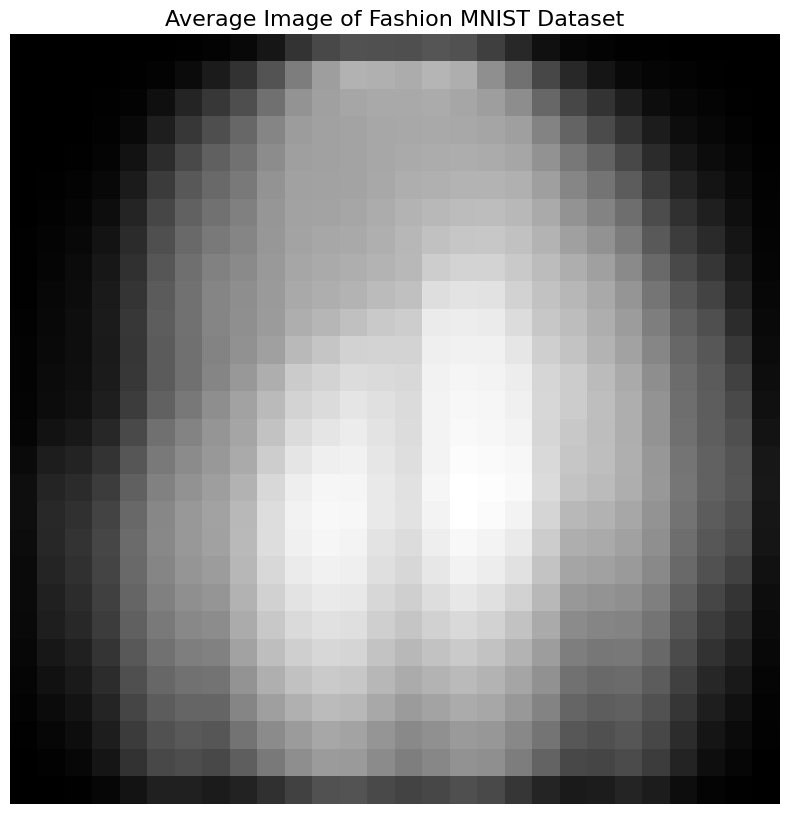

In [ ]:
# Compute the mean image from dataset
mean_fashion_image = np.mean(
    dataset.drop(['label', 'label_name'], axis=1).values.reshape(-1, 28, 28),
    axis=0
)

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(mean_fashion_image, cmap='gray')
plt.title("Average Image of Fashion MNIST Dataset", fontsize=16)
plt.axis('off')
plt.show()


#### Average image of Each Class in Fashion MNIST Dataset

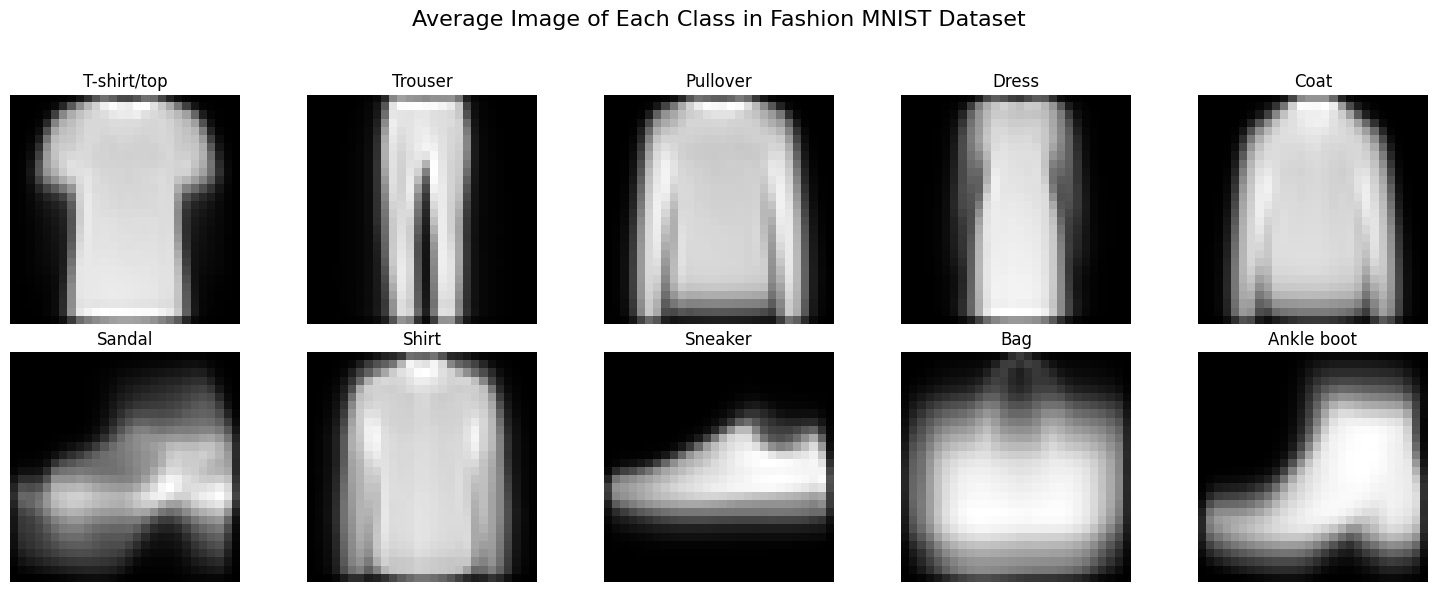

In [ ]:
# Compute the average image for each class in the dataset
average_images_by_label = {
    label: np.mean(
        dataset[dataset['label'] == label].drop(['label', 'label_name'], axis=1).values,
        axis=0
    ).reshape(28, 28)
    for label in range(10)
}

# Plot
plt.figure(figsize=(15, 6))

for label, average_image in average_images_by_label.items():
    plt.subplot(2, 5, label + 1)
    plt.imshow(average_image, cmap='gray')
    plt.title(labels_mapping[label])
    plt.axis('off')

plt.suptitle("Average Image of Each Class in Fashion MNIST Dataset", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


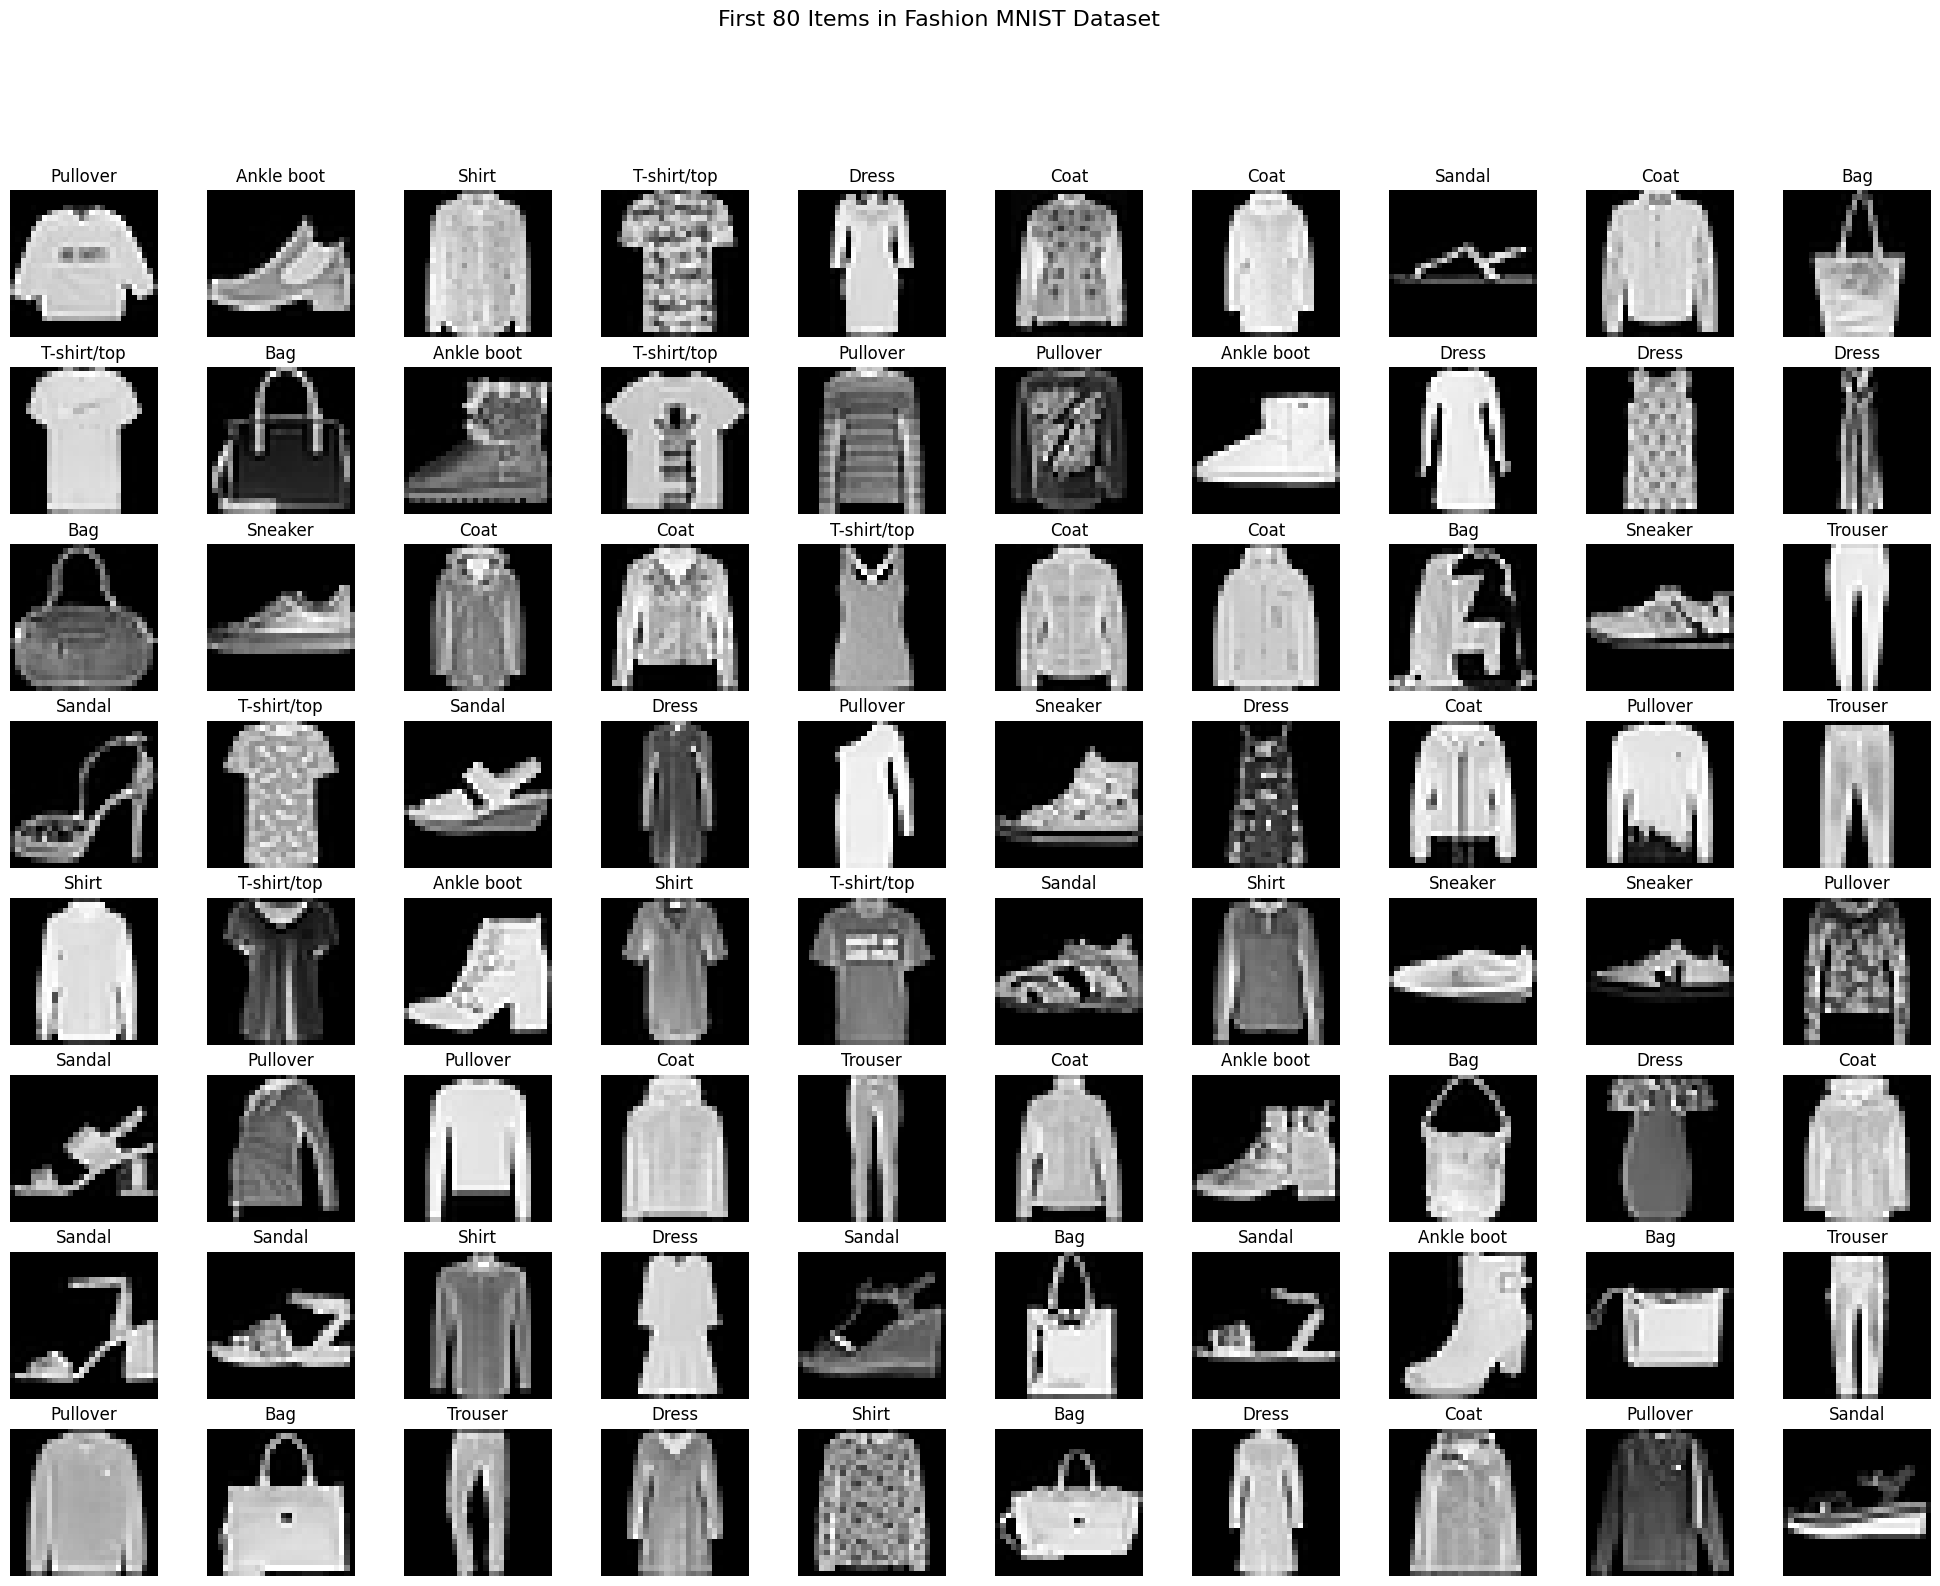

In [ ]:
fig = plt.figure(figsize=(25, 18))

# Loop through the first 80 items
for index in range(80):
    # Plot
    plt.subplot(8, 10, index + 1)

    # Reshape the image data
    image_data = np.array(dataset.iloc[index, 1:-1], dtype='float').reshape(28, 28)
    plt.imshow(image_data, cmap='gray')

    plt.title(dataset.iloc[index, -1])

    plt.axis('off')

plt.suptitle("First 80 Items in Fashion MNIST Dataset", fontsize=16)

# Display the plot
plt.show()


### Visualization the distribution of classes in the training dataset

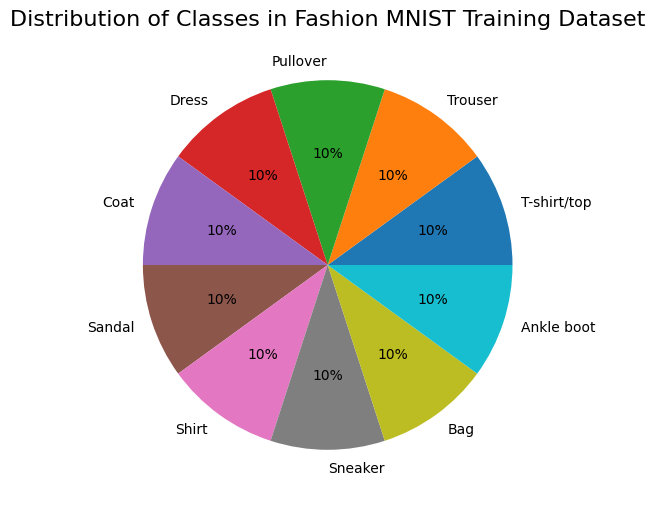

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Distribution of Classes in Fashion MNIST Training Dataset", fontsize=16)

# Calculate the number of items for each class
class_counts = [len(dataset.iloc[:, 0][dataset.iloc[:, 0] == label]) for label in labels_mapping]

# Pie chart
plt.pie(
    class_counts,
    labels=[class_name for class_name in labels_mapping.values()],
    autopct='%1.0f%%'
)

plt.show()

### Data Scaling & Normalization

In [ ]:
# Data preprocessing
Y = dataset['label']
X = dataset.drop(['label', 'label_name'], axis=1)

In [ ]:
# Standarization
X_scaled = StandardScaler().fit_transform(X)

# Normalization
X_normalized = normalize(X_scaled)

X = pd.DataFrame(X_normalized)

X.head(10)

0         1         2         3         4         5         6    \
0 -0.000292 -0.000698 -0.000889 -0.001278 -0.001770 -0.002168 -0.003016   
1 -0.000370 -0.000884 -0.001126 -0.001619 -0.002243 -0.002747 -0.003822   
2 -0.000373 -0.000891 -0.001135 -0.001632 -0.002260 -0.002768 -0.003851   
3 -0.000403 -0.000962 -0.001226  0.015529  0.017254 -0.002990 -0.004160   
4 -0.000385 -0.000920 -0.001172 -0.001685 -0.002334 -0.002858 -0.003976   
5 -0.000486 -0.001159 -0.001477  0.102029  0.044512  0.040171  0.026086   
6 -0.000368 -0.000879 -0.001119 -0.001609 -0.002229 -0.002730 -0.003798   
7 -0.000349 -0.000832 -0.001060 -0.001524 -0.002111 -0.002585 -0.003597   
8 -0.000321 -0.000765 -0.000975 -0.001401 -0.001942 -0.002378  0.009007   
9 -0.000388 -0.000925 -0.001179 -0.001695 -0.002348 -0.002875 -0.004000   

        7         8         9    ...       774       775       776       777  \
0 -0.004796 -0.007335 -0.011621  ... -0.018501 -0.014665 -0.012150 -0.012497   
1 -0.006078 -0.009295 -0.014728  ... -0.023446 -0.018585 -0.015398 -0.015837   
2  0.007805 -0.009365 -0.014839  ... -0.023623 -0.018725 -0.015514  0.010832   
3 -0.006616 -0.010118 -0.016031  ... -0.023310 -0.020229 -0.016760 -0.017239   
4 -0.006324 -0.009671 -0.015323  ... -0.024394 -0.019336 -0.016020 -0.016477   
5  0.002907 -0.001463 -0.011314  ... -0.024529 -0.016002 -0.011670 -0.016118   
6 -0.006040 -0.009237 -0.014636  ... -0.013879 -0.018469 -0.015302 -0.015739   
7 -0.005720 -0.008747 -0.013859  ... -0.022064 -0.017489 -0.014490 -0.014904   
8 -0.000474 -0.008045 -0.012746  ... -0.019706 -0.016084 -0.013326 -0.013707   
9 -0.006361 -0.009728 -0.015414  ...  0.119324  0.159187  0.145147 -0.016575   

        778       779       780       781       782       783  
0 -0.013535 -0.012198 -0.008847 -0.004866 -0.002811 -0.001016  
1 -0.017152 -0.015459 -0.011211 -0.006167 -0.003563 -0.001288  
2  0.015290 -0.015575 -0.011296 -0.006213 -0.003590 -0.001297  
3 -0.018670 -0.015887 -0.012203 -0.006712 -0.003878 -0.001402  
4 -0.017845 -0.016083 -0.011664 -0.006416 -0.003707 -0.001340  
5 -0.019533 -0.012348 -0.006074 -0.008086 -0.004672 -0.001688  
6 -0.017045 -0.015362 -0.011141 -0.006128 -0.003541 -0.001280  
7 -0.016141 -0.014547 -0.010550 -0.005803 -0.003353 -0.001212  
8 -0.014845 -0.013379 -0.009703 -0.005337 -0.003083 -0.001114  
9 -0.017951 -0.016179 -0.011733 -0.006454 -0.003729 -0.001348  

[10 rows x 784 columns]

### PCA Reduction 2D


In [ ]:
# PCA reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X)

# Adding meaningful columns
data_pca = pd.DataFrame(data_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Adding labels
data_pca_extended = data_pca.copy()
data_pca_extended["label"] = Y

data_pca_extended

Principal Component 1  Principal Component 2  label
0                   0.312016               0.529822      2
1                  -0.468679               0.487026      9
2                   0.823919               0.226274      6
3                   0.426068              -0.222853      0
4                   0.530604              -0.397604      3
...                      ...                    ...    ...
59995               0.023004               0.547253      9
59996              -0.405191              -0.694493      1
59997               0.316387               0.079755      8
59998               0.101312               0.611040      8
59999              -0.298753               0.525500      7

[60000 rows x 3 columns]

#### Explained variance ratios

In [ ]:
# Explained variance ratios
print(pca.explained_variance_ratio_)

[0.23905196 0.15489282]


### Dimensionality reduced plot

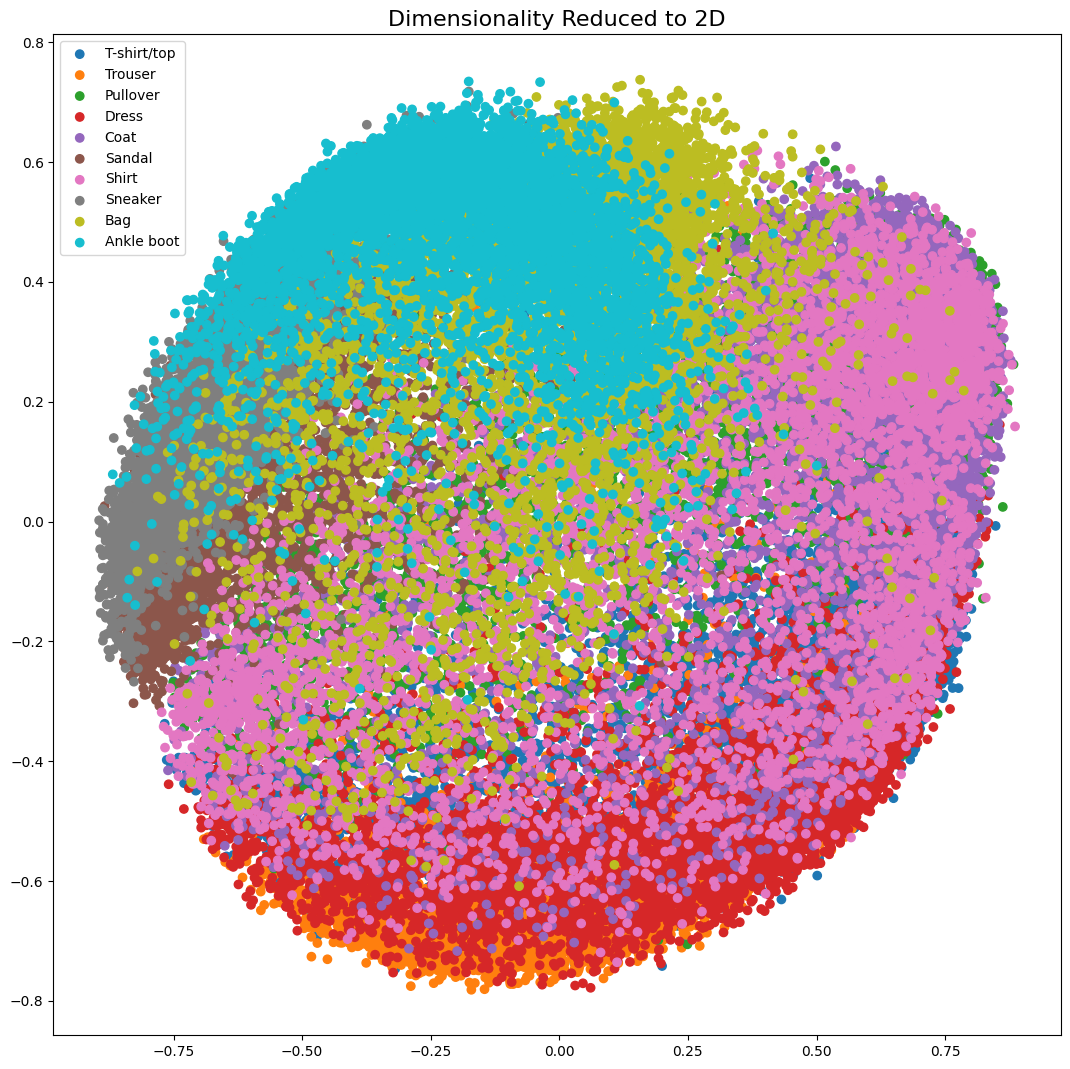

In [ ]:
fig, ax = plt.subplots(figsize=(13, 13))

# Plot
for label, group in data_pca_extended.groupby("label"):
    ax.scatter(
        group["Principal Component 1"],
        group["Principal Component 2"],
        marker="o",
        linestyle="",
        label=labels_mapping[label]  # Map the numeric label to its descriptive name
    )

ax.legend()
ax.set_title("Dimensionality Reduced to 2D", fontsize=16)

plt.show()

### PCA Reduction 3D

In [ ]:
# PCA reduction 3D
pca = PCA(n_components=3)
data_pca = pca.fit_transform(X)

# Adding meaningful columns
data_pca = pd.DataFrame(
    data_pca,
    columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3']
)

# Adding labels
data_pca_extended = data_pca.copy()
data_pca_extended["label"] = Y

data_pca_extended

Principal Component 1  Principal Component 2  Principal Component 3  \
0                   0.312016               0.529822               0.169077   
1                  -0.468679               0.487026               0.316741   
2                   0.823919               0.226274              -0.229459   
3                   0.426068              -0.222853              -0.033829   
4                   0.530604              -0.397604               0.297931   
...                      ...                    ...                    ...   
59995               0.023004               0.547253               0.321862   
59996              -0.405191              -0.694493              -0.037234   
59997               0.316387               0.079755               0.080096   
59998               0.101312               0.611040               0.085617   
59999              -0.298753               0.525500               0.376335   

       label  
0          2  
1          9  
2          6  
3          0  
4          3  
...      ...  
59995      9  
59996      1  
59997      8  
59998      8  
59999      7  

[60000 rows x 4 columns]

#### Explained variance ratios

In [ ]:
# Explained variance ratios
print(pca.explained_variance_ratio_)

[0.23905196 0.15489282 0.07215288]


#### Dimensionality reduced plot

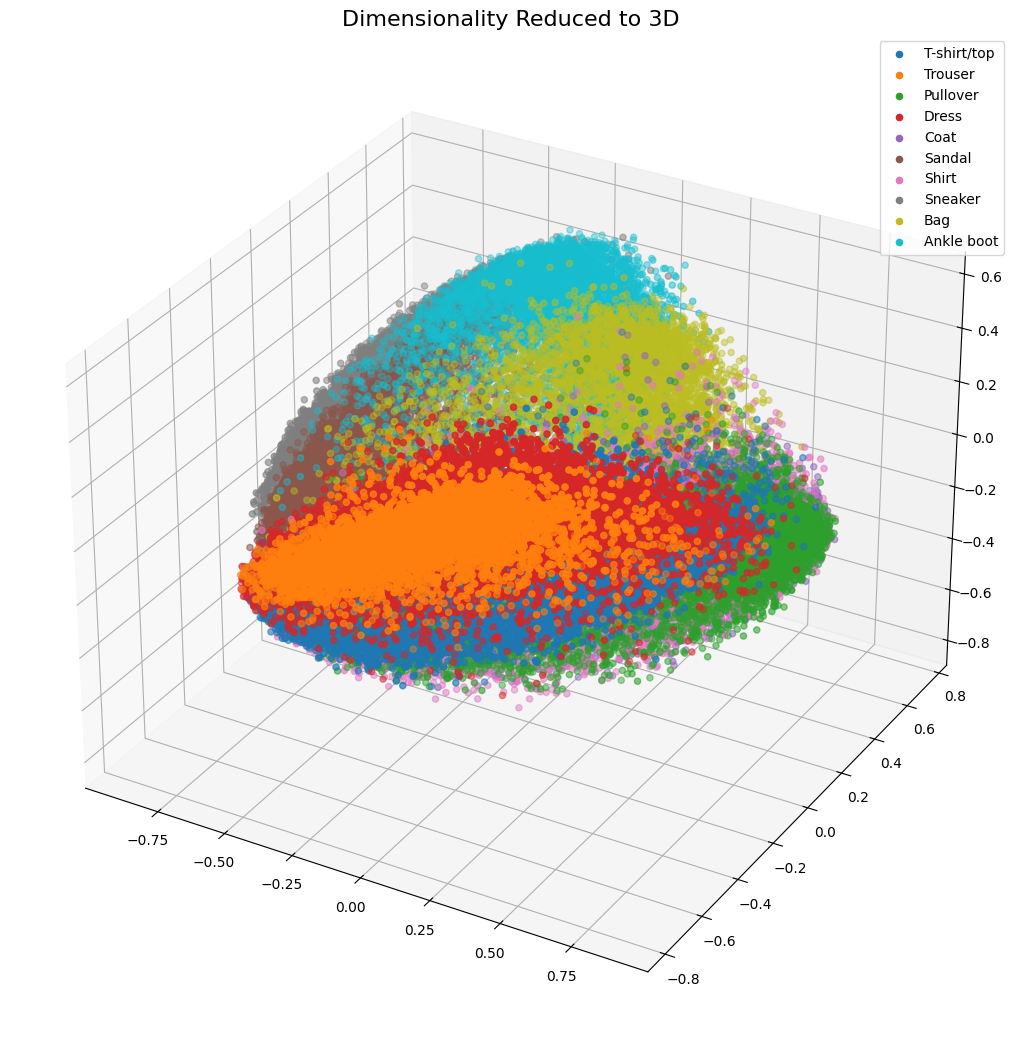

In [ ]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')

# Plot
for label, group in data_pca_extended.groupby("label"):
    ax.scatter(
        group["Principal Component 1"],
        group["Principal Component 2"],
        group["Principal Component 3"],
        marker="o",
        label=labels_mapping[label]  # Map the numeric label to its descriptive name
    )

ax.legend()
ax.set_title("Dimensionality Reduced to 3D", fontsize=16)

plt.show()

### Scree Plot

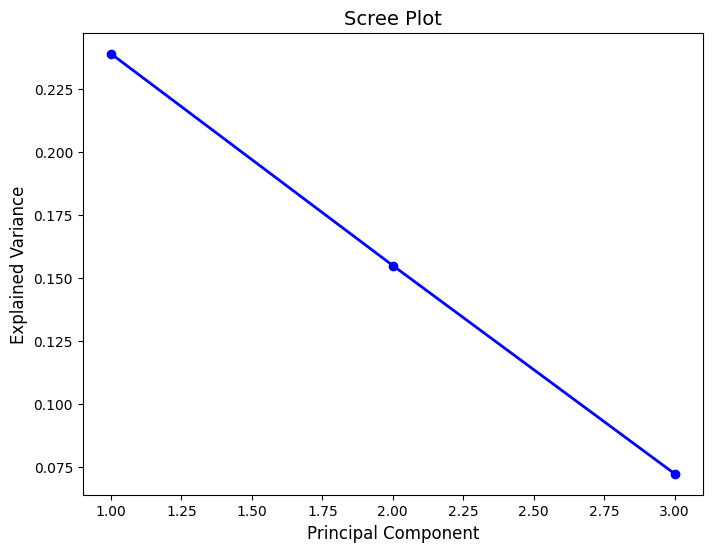

In [ ]:
# Plot the explained variance ratio for each principal component
plt.figure(figsize=(8, 6))
plt.plot(
    np.arange(pca.n_components_) + 1,  # Principal component numbers
    pca.explained_variance_ratio_,
    marker='o',
    linestyle='-',
    linewidth=2,
    color='blue'
)

plt.title('Scree Plot', fontsize=14)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)

plt.show()

### Maximum Likelihood Estimation

In [ ]:
# Compute the explained variance using PCA with MLE (Maximum Likelihood Estimation) for optimal number of components
pca_mle = PCA(n_components='mle')
explained_variance = pca_mle.fit(X).explained_variance_

# Calculate the cumulative sum of explained variance
cumsum = np.cumsum(explained_variance)

# Determine the number of dimensions needed to explain at least 95% of the variance
dimensions = np.argmax(cumsum >= 0.95) + 1  # +1 because indices are zero-based
print(f'Dimensions required to explain 95% variance: {dimensions}')

explained_variance

Dimensions required to explain 95% variance: 273


array([2.38052509e-01, 1.54245230e-01, 7.18512193e-02, 4.50875837e-02,
       3.62937275e-02, 3.40413200e-02, 2.35382866e-02, 1.73230830e-02,
       1.49499162e-02, 1.41481940e-02, 1.16438611e-02, 9.47528933e-03,
       8.55702119e-03, 7.28604629e-03, 6.99088501e-03, 6.24692639e-03,
       6.09724051e-03, 5.61799432e-03, 5.44532524e-03, 5.05604053e-03,
       4.99703549e-03, 4.62626285e-03, 4.40280321e-03, 4.35552586e-03,
       4.07421384e-03, 4.05990026e-03, 3.88315397e-03, 3.80843040e-03,
       3.58859710e-03, 3.39895073e-03, 3.32837364e-03, 3.22541191e-03,
       3.10339174e-03, 2.97514522e-03, 2.87448218e-03, 2.78813842e-03,
       2.66834375e-03, 2.60835444e-03, 2.45800539e-03, 2.42226040e-03,
       2.33493357e-03, 2.32772221e-03, 2.29693919e-03, 2.26975553e-03,
       2.20061668e-03, 2.14039049e-03, 2.10970659e-03, 2.03651327e-03,
       2.00709048e-03, 1.94447099e-03, 1.88089551e-03, 1.85919164e-03,
       1.82878801e-03, 1.74458788e-03, 1.70337232e-03, 1.68506655e-03,
      

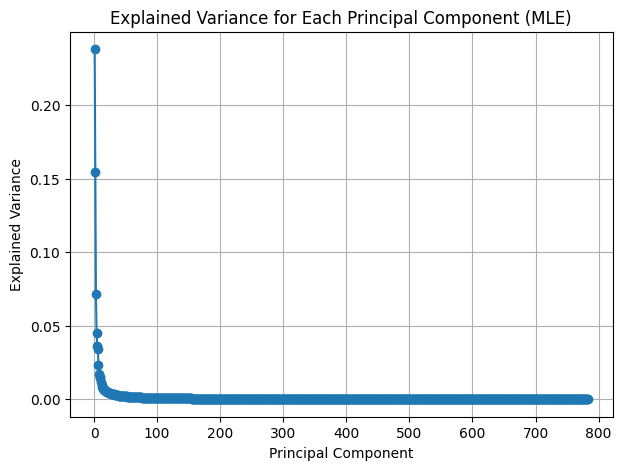

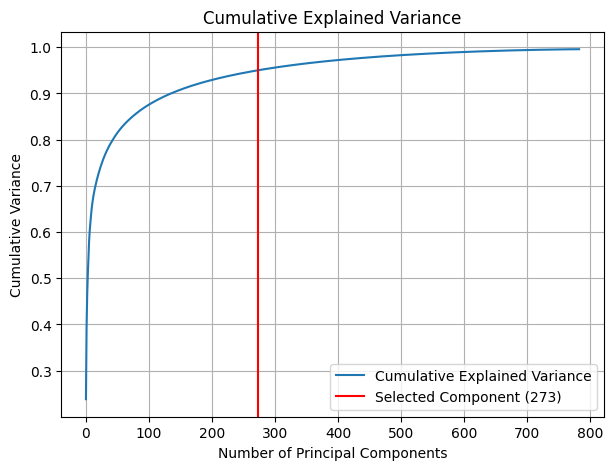

In [ ]:
# Plot 1: Explained Variance for Each Principal Component
plt.figure(figsize=(7, 5))
plt.plot(
    range(1, len(explained_variance) + 1),
    explained_variance,
    marker='o'
)
plt.title('Explained Variance for Each Principal Component (MLE)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid(True)

# Plot 2: Cumulative Explained Variance
plt.figure(figsize=(7, 5))
plt.plot(
    cumsum,
    label='Cumulative Explained Variance'
)
plt.axvline(
    x=273,
    color='r',
    linestyle='-',
    label='Selected Component (273)'
)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.legend()
plt.grid(True)

plt.show()

### t-SNE dimensionality reduction


In [ ]:
# Data import
tsne_train = pd.read_csv('./data/fashion-mnist_train.csv')

In [ ]:
# Data preprocessing
X_tsne = tsne_train.drop(['label'], axis=1)
Y_tsne = tsne_train['label']

# Standarization
X_tsne_scaled = StandardScaler().fit_transform(X_tsne)
# Normalization
X_tsne_normalized = normalize(X_tsne_scaled)
X_tsne = pd.DataFrame(X_tsne_normalized)

### 2D Reduction

In [ ]:
# t-SNE transformation
data_tsne = TSNE(n_components=2).fit_transform(X_tsne)

# Adding meannigful columns
data_tsne = pd.DataFrame(
    data_tsne,  # Transformed data
    columns=["Principal Component 1", "Principal Component 2"]
)

# Adding labels
data_tsne["label"] = Y_tsne

data_tsne

Principal Component 1  Principal Component 2  label
0                   7.217044              50.078716      2
1                 -76.680397              43.895885      9
2                  69.307274             -14.621000      6
3                  19.541164             -10.267080      0
4                  47.951313             -66.574348      3
...                      ...                    ...    ...
59995             -47.707817              73.308678      9
59996             -34.147240             -69.564529      1
59997             -25.005915               9.362333      8
59998              -0.699714              44.576206      8
59999             -81.880486               1.128064      7

[60000 rows x 3 columns]

#### Dimensionality reduced plot

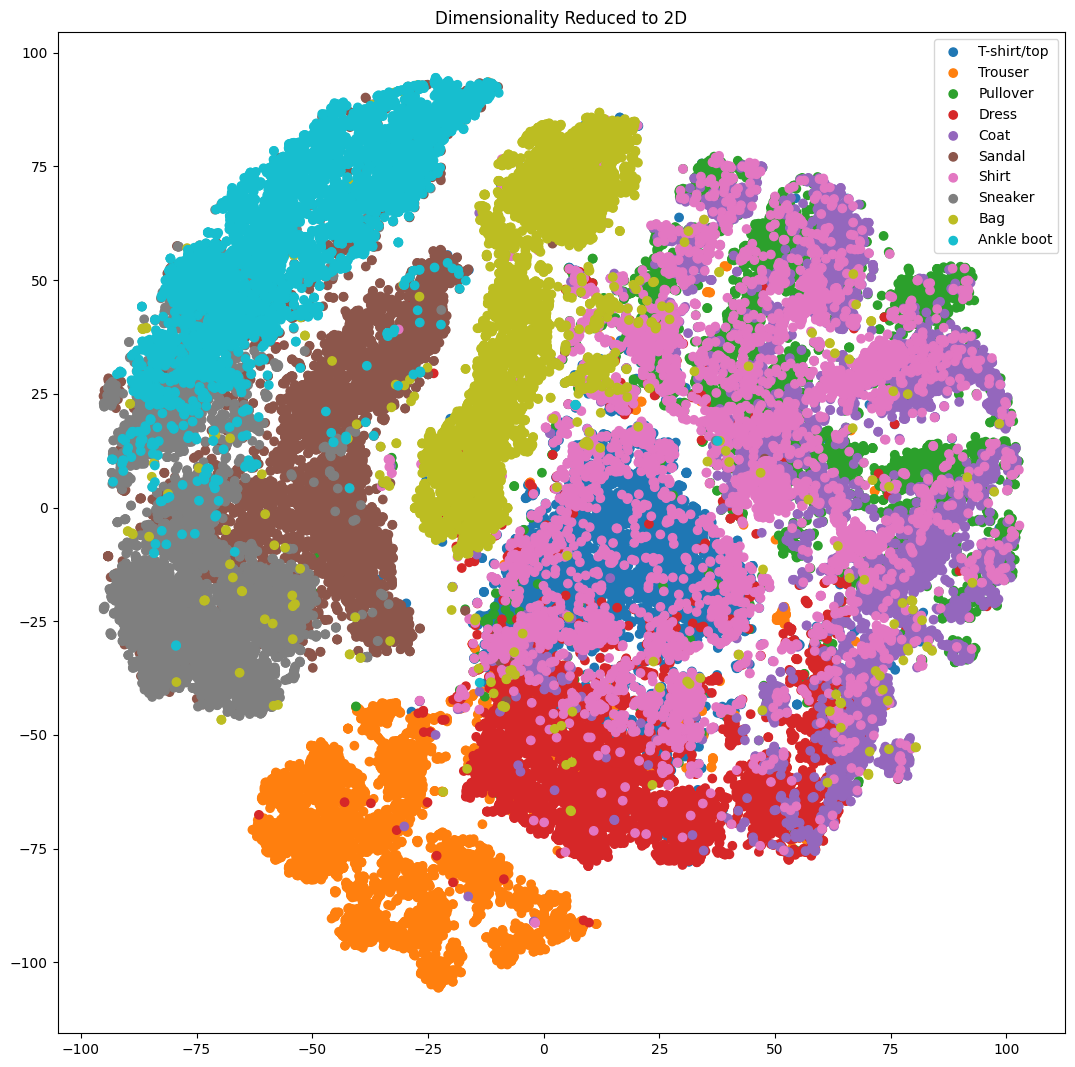

In [ ]:
fig, ax = plt.subplots(figsize=(13, 13))

# Plot
for label, group in data_tsne.groupby("label"):
    ax.scatter(
        group["Principal Component 1"],
        group["Principal Component 2"],
        marker="o",
        linestyle="",
        label=labels_mapping[label]
    )

ax.legend()
ax.set_title("Dimensionality Reduced to 2D")

plt.show()

### 3D Reduction


In [ ]:
# t-SNE transformation 3D
data_tsne = TSNE(n_components=3).fit_transform(X_tsne)

data_tsne = pd.DataFrame(
    data_tsne,
    columns=["Principal Component 1", "Principal Component 2", "Principal Component 3"]
)

# Adding the labels
data_tsne["label"] = Y_tsne

data_tsne

Principal Component 1  Principal Component 2  Principal Component 3  \
0                  -3.093688              14.766241              -1.535961   
1                 -19.036673              19.833941              12.345217   
2                  21.254541              -3.229885             -10.297132   
3                  10.576492               2.390294              18.451380   
4                  17.308088             -19.460785              -0.137776   
...                      ...                    ...                    ...   
59995              -4.904375              14.125023              20.203360   
59996             -17.864656             -16.826351               7.317701   
59997              -9.865639              -0.003184             -27.464384   
59998              -9.846754              14.569160             -13.813529   
59999             -30.219252               7.981941              -3.426487   

       label  
0          2  
1          9  
2          6  
3          0  
4          3  
...      ...  
59995      9  
59996      1  
59997      8  
59998      8  
59999      7  

[60000 rows x 4 columns]

#### Dimensionality reduced plot

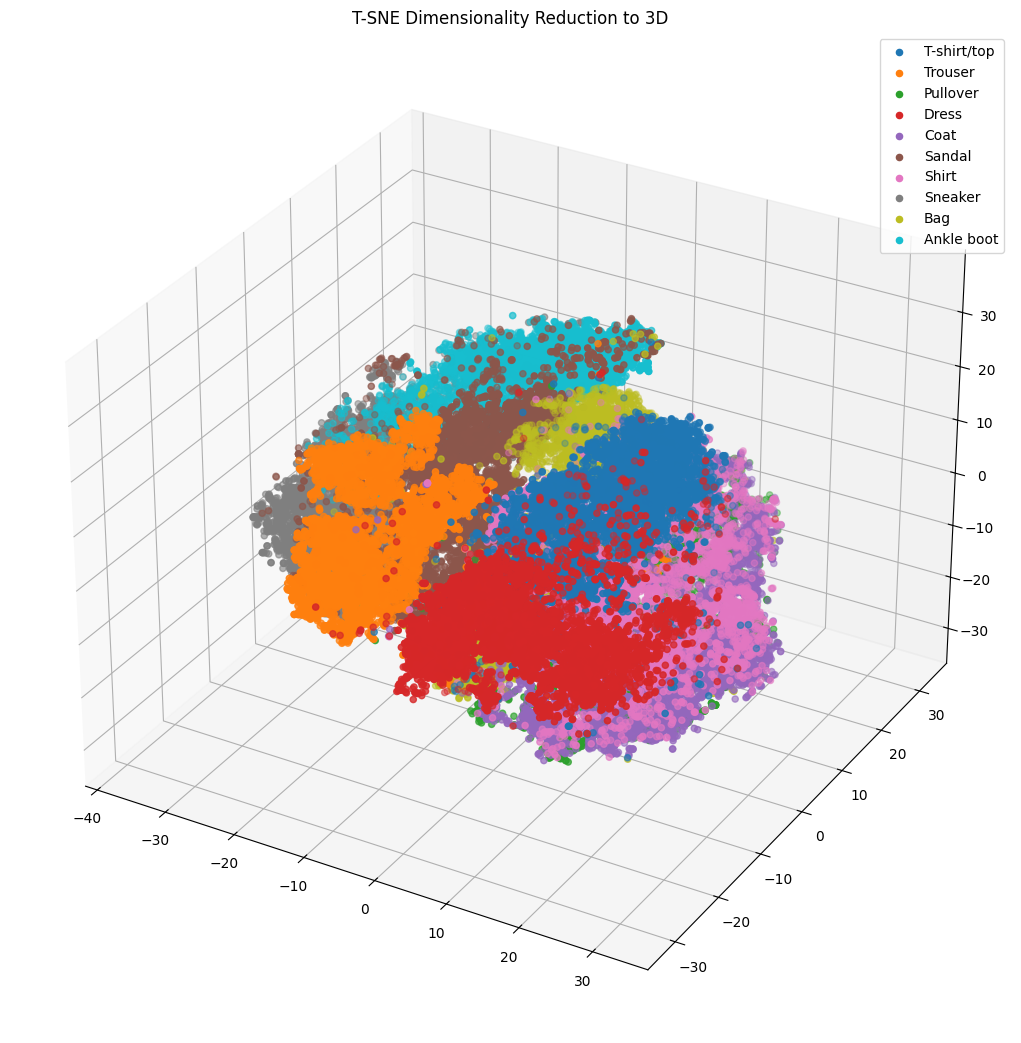

In [ ]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(projection='3d')

# Plot
for label, group in data_tsne.groupby("label"):
    ax.scatter(
        group["Principal Component 1"],
        group["Principal Component 2"],
        group["Principal Component 3"],
        marker="o",
        label=labels_mapping[label]
    )

ax.legend()
ax.set_title("T-SNE Dimensionality Reduction to 3D")

plt.show()

### Gaussian Random Projection dimensionality reduction

In [ ]:
# Data import
grp_train = pd.read_csv('./data/fashion-mnist_train.csv')

In [ ]:
# Data preprocessing
X_grp = grp_train.drop(['label'], axis=1)
Y_grp = grp_train['label']

# Standarization
X_grp_scaled = StandardScaler().fit_transform(X_grp)
# Normalization
X_grp_normalized = normalize(X_grp_scaled)
X_grp = pd.DataFrame(X_grp_normalized)

### 2D Reduction


In [ ]:
# Gaussian Random Projection 2D
data_grp = GaussianRandomProjection(n_components=2).fit_transform(X_grp)

# Adding meaningful columns
data_grp = pd.DataFrame(
    data_grp,
    columns=["Principal Component 1", "Principal Component 2"]
)

# Adding labels
data_grp["label"] = Y_grp

data_grp

Principal Component 1  Principal Component 2  label
0                   1.793346              -0.716887      2
1                  -0.258717              -0.097687      9
2                   0.921413               0.726301      6
3                   0.109276               0.289760      0
4                   0.900628               0.770362      3
...                      ...                    ...    ...
59995              -0.058532              -0.615083      9
59996              -0.378814               0.082474      1
59997              -0.863726              -0.393088      8
59998              -0.204659              -0.682030      8
59999              -0.365352              -0.127395      7

[60000 rows x 3 columns]

#### Dimensionality reduced plot

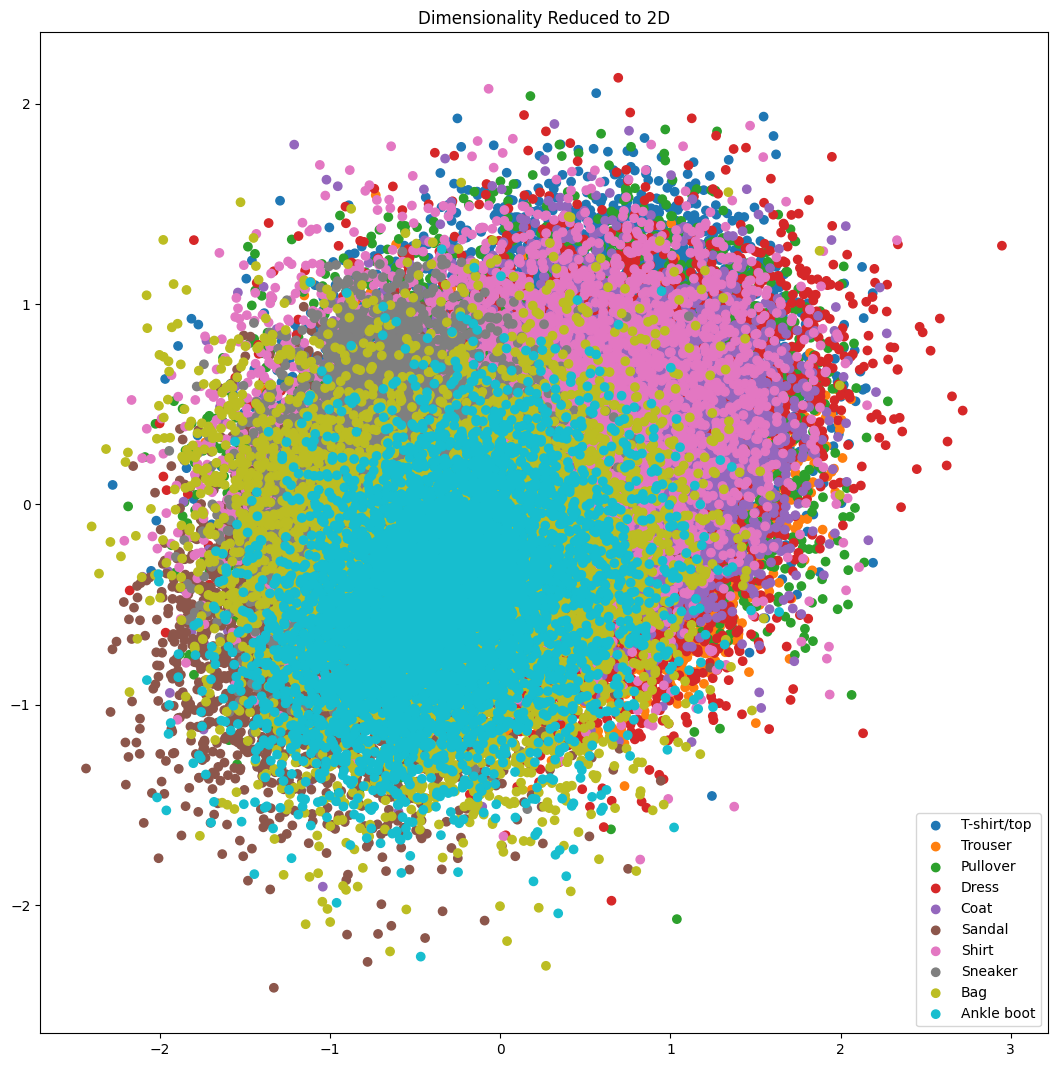

In [ ]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot()

# Plot
for label, group in data_grp.groupby("label"):
    ax.scatter(
        group["Principal Component 1"],
        group["Principal Component 2"],
        marker="o",
        linestyle="",
        label=labels_mapping[label]
    )

ax.legend()
ax.set_title("Dimensionality Reduced to 2D")

plt.show()

### 3D Reduction

In [ ]:
# Gaussian Random Projection 3D
data_grp = GaussianRandomProjection(n_components=3).fit_transform(X_grp)
# Adding meaningful columns
data_grp = pd.DataFrame(
    data_grp,
    columns=["Principal Component 1", "Principal Component 2", "Principal Component 3"]
    )

# Adding the labels
data_grp["label"] = Y_grp

data_grp

Principal Component 1  Principal Component 2  Principal Component 3  \
0                   0.051520               0.299712              -0.269096   
1                  -0.474868               0.181067              -0.839241   
2                   0.072672              -0.587522               0.021503   
3                   0.267541              -0.181809               0.616320   
4                  -0.395544               0.690093              -0.117354   
...                      ...                    ...                    ...   
59995              -0.043436              -0.952934              -1.160640   
59996              -0.596433               0.900741               0.159185   
59997              -0.760362              -0.932658              -0.013759   
59998               0.296594              -1.114666              -0.480008   
59999               0.057970              -0.001733              -0.303057   

       label  
0          2  
1          9  
2          6  
3          0  
4          3  
...      ...  
59995      9  
59996      1  
59997      8  
59998      8  
59999      7  

[60000 rows x 4 columns]

#### Dimensionality reduced plot

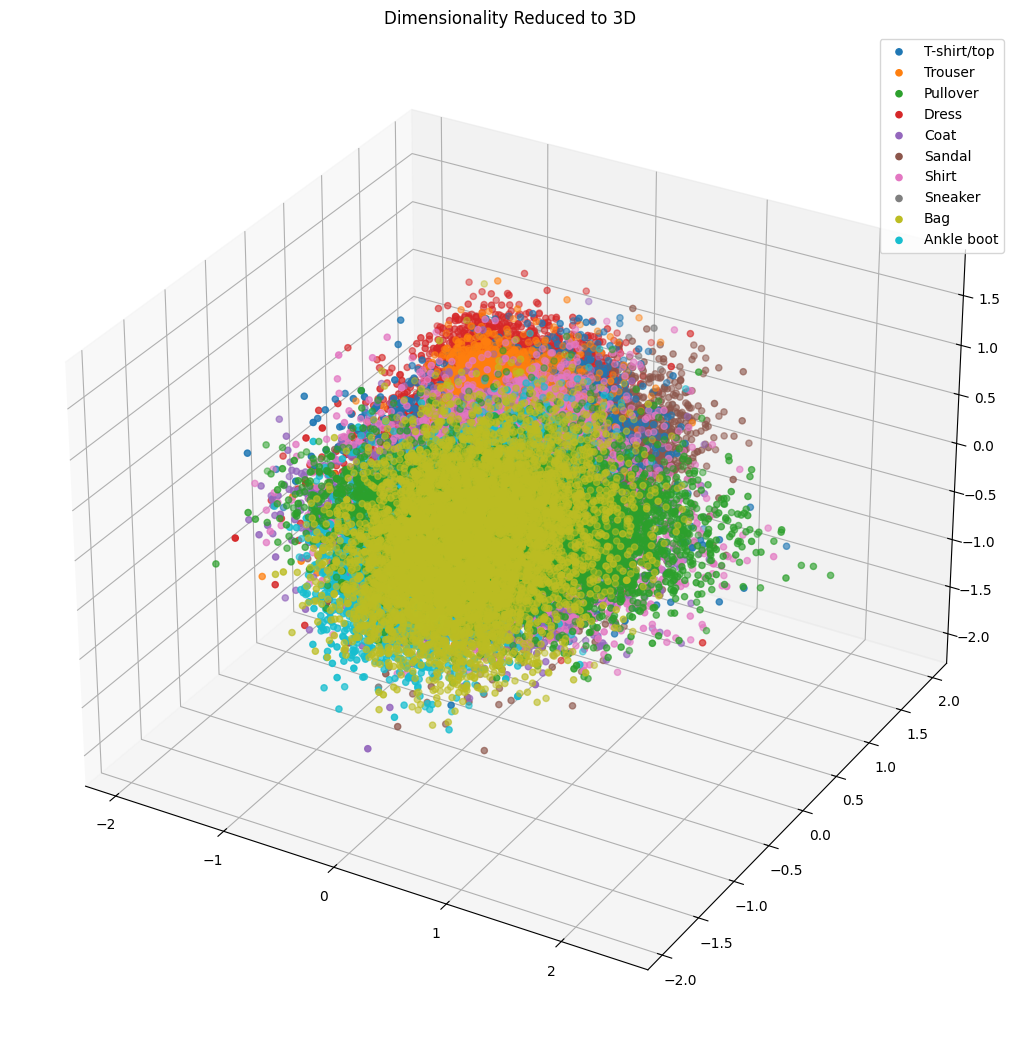

In [ ]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(projection='3d')

# Plot
for label, group in data_grp.groupby("label"):
    ax.scatter(
        group["Principal Component 1"],
        group["Principal Component 2"],
        group["Principal Component 3"],
        marker="o",
        linestyle="",
        label=labels_mapping[label]
    )

ax.legend()
ax.set_title("Dimensionality Reduced to 3D")

plt.show()